In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,SimpleRNN,Dropout

In [2]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/kmeans/data-preprocess.csv')
X = pd.read_csv('data/kmeans/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [3]:
X_train = pd.read_csv('data/kmeans/data-train.csv')
X_test = pd.read_csv('data/kmeans/data-test.csv')
y_train = X_train['Class']
y_test = X_test['Class']

In [4]:
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

In [5]:
model = Sequential()
model.add(SimpleRNN(64,activation='sigmoid', input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

predictions = model.predict(X_test)
y_pred = [0 if x <= 0.9 else (1 if 0.5 < x <= 1.0 else 2) for x in predictions]

Epoch 1/10


c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3336 - val_loss: 0.0000e+00 - val_accuracy: 0.2976
Epoch 2/10
38/83 [============>.................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3314

c:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3336 - val_loss: 0.0000e+00 - val_accuracy: 0.2976
Epoch 3/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3336 - val_loss: 0.0000e+00 - val_accuracy: 0.2976
Epoch 4/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3336 - val_loss: 0.0000e+00 - val_accuracy: 0.2976
Epoch 5/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3336 - val_loss: 0.0000e+00 - val_accuracy: 0.2976
Epoch 6/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3336 - val_loss: 0.0000e+00 - val_accuracy: 0.2976
Epoch 7/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3336 - val_loss: 0.0000e+00 - val_accuracy: 0.2976
Epoch 8/10
83/83 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3370 - val_loss: 0.0000e+0

In [7]:
np.unique(predictions)

array([1.28327104e-23, 1.28456895e-23, 1.28527474e-23, 1.28554935e-23,
       1.28591719e-23, 1.28613302e-23, 1.28626066e-23, 1.28641275e-23,
       1.28643729e-23, 1.28646671e-23, 1.28647657e-23, 1.28655996e-23,
       4.84277646e-22, 4.85065244e-22, 4.85080087e-22, 4.85107805e-22,
       4.85194794e-22, 4.85224430e-22, 4.89030568e-20, 4.89069762e-20,
       4.89077226e-20, 4.89079100e-20, 4.89082816e-20, 1.46014904e-18,
       1.46565145e-18, 1.46588626e-18, 1.46631691e-18, 1.76657999e-16,
       1.76659349e-16, 1.76663399e-16, 1.76668110e-16, 1.76674847e-16,
       1.76678222e-16, 4.61657379e-09, 4.61689975e-09, 4.61700544e-09,
       4.61704053e-09, 7.87662628e-08, 7.88761625e-08, 2.61626610e-07,
       2.66266198e-07, 2.66275066e-07, 2.66446790e-07, 2.66455942e-07,
       2.66493799e-07, 2.66515400e-07, 2.66538024e-07, 2.66544646e-07,
       9.67144668e-01, 9.67158258e-01, 9.67166841e-01, 9.67168033e-01,
       9.67171788e-01, 9.67172980e-01, 9.67177808e-01, 9.67181265e-01,
      

In [8]:
np.unique(y_pred)

array([0, 1])

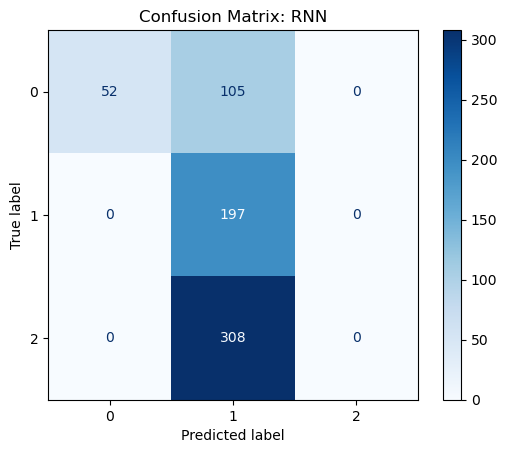

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: RNN")
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50       157
           1       0.32      1.00      0.49       197
           2       0.00      0.00      0.00       308

    accuracy                           0.38       662
   macro avg       0.44      0.44      0.33       662
weighted avg       0.33      0.38      0.26       662



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
